In [1]:
library(ggplot2)
library(readr)
library(dplyr)
library(RColorBrewer)
library(reshape2)
library(gridExtra)
library(scales)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'scales'

The following object is masked from 'package:readr':

    col_factor



In [2]:
search()

[1] ".GlobalEnv"           "package:scales"       "package:gridExtra"   
 [4] "package:reshape2"     "package:RColorBrewer" "package:dplyr"       
 [7] "package:readr"        "package:ggplot2"      "jupyter:irkernel"    
[10] "package:stats"        "package:graphics"     "package:grDevices"   
[13] "package:utils"        "package:datasets"     "package:methods"     
[16] "Autoloads"            "package:base"

In [3]:
df = read_csv('vgsales.csv')

Parsed with column specification:
cols(
  Rank = col_double(),
  Name = col_character(),
  Platform = col_character(),
  Year = col_character(),
  Genre = col_character(),
  Publisher = col_character(),
  NA_Sales = col_double(),
  EU_Sales = col_double(),
  JP_Sales = col_double(),
  Other_Sales = col_double(),
  Global_Sales = col_double()
)


In [4]:
head(df)

Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [5]:
summary(df)

      Rank           Name             Platform             Year          
 Min.   :    1   Length:16598       Length:16598       Length:16598      
 1st Qu.: 4151   Class :character   Class :character   Class :character  
 Median : 8300   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 8301                                                           
 3rd Qu.:12450                                                           
 Max.   :16600                                                           
    Genre            Publisher            NA_Sales          EU_Sales      
 Length:16598       Length:16598       Min.   : 0.0000   Min.   : 0.0000  
 Class :character   Class :character   1st Qu.: 0.0000   1st Qu.: 0.0000  
 Mode  :character   Mode  :character   Median : 0.0800   Median : 0.0200  
                                       Mean   : 0.2647   Mean   : 0.1467  
                                       3rd Qu.: 0.2400   3rd Qu.: 0.1100  
                                

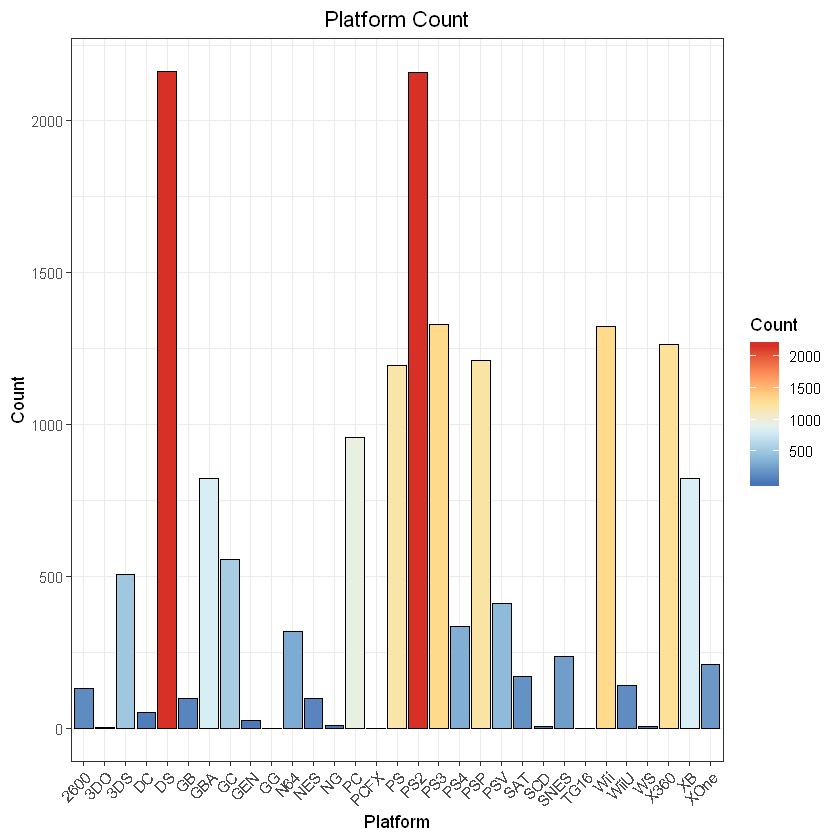

In [6]:
platform = df %>% group_by(Platform) %>% summarise(Count = n())
p1 = ggplot(aes(x = Platform , y = Count , fill=Count) , data=platform) +
geom_bar(colour='black',stat='identity') +
theme_bw()+
theme(axis.text.x = element_text(angle=45,hjust=1) , 
      plot.title = element_text(hjust=0.5))+  # title center
ggtitle('Platform Count')+
scale_fill_distiller(palette = 'RdYlBu') +
ylab('Count')




grid.arrange(p1, ncol = 1)

Using Platform as id variables


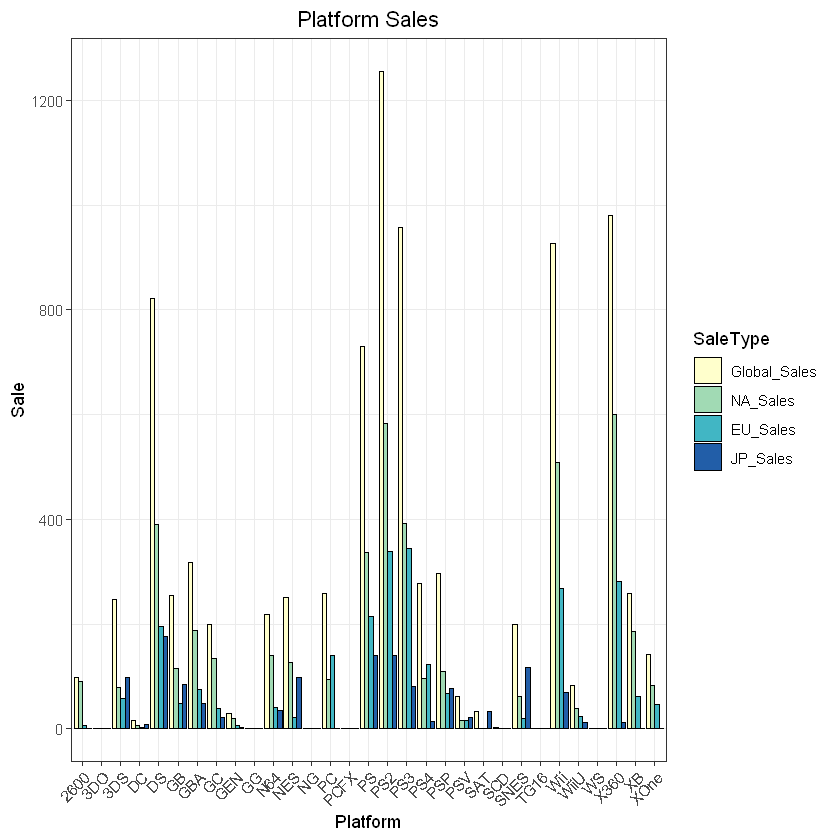

In [7]:
platform_sales = df %>% group_by(Platform) %>% summarise(Global_Sales = sum(Global_Sales),
                                                         NA_Sales = sum(NA_Sales),
                                                         EU_Sales = sum(EU_Sales),
                                                         JP_Sales = sum(JP_Sales))

platform_sales = melt(platform_sales)
names(platform_sales) = c('Platform','SaleType','Sale')
ggplot(data = platform_sales,aes(x = Platform ,y = Sale , fill = SaleType)) + 
geom_bar(colour='black',stat='identity',position='dodge') + 
theme_bw()+
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5))+
ggtitle('Platform Sales') +
scale_fill_brewer(palette = 'YlGnBu')

Using Genre as id variables


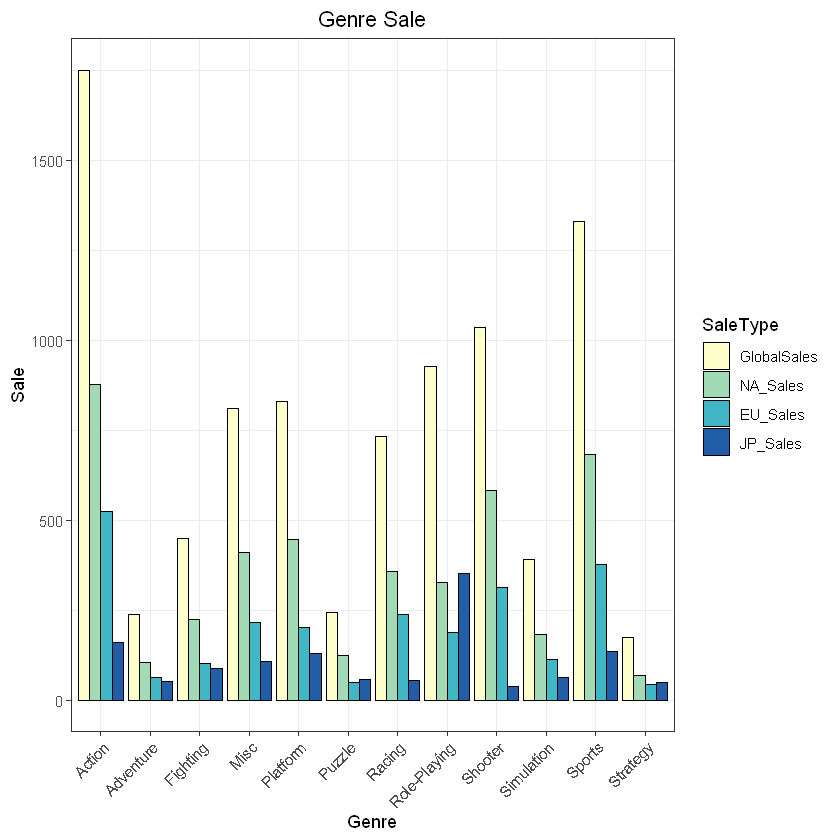

In [8]:
genre_sales = df %>% group_by(Genre) %>% summarise(GlobalSales = sum(Global_Sales),
                                                   NA_Sales = sum(NA_Sales),
                                                   EU_Sales = sum(EU_Sales),
                                                   JP_Sales = sum(JP_Sales)) 
genre_sales = melt(genre_sales)
names(genre_sales) = c('Genre','SaleType','Sale')

ggplot(data=genre_sales,aes(x = Genre,y = Sale,fill=SaleType)) + 
geom_bar(colour='black' , stat='identity', position='dodge') +  
theme_bw()+
theme(axis.text.x = element_text(hjust=1,angle=45),
      plot.title = element_text(hjust=0.5)) + # center 
ggtitle('Genre Sale') + 
scale_fill_brewer(palette = 'YlGnBu')+
ylab('Sale')

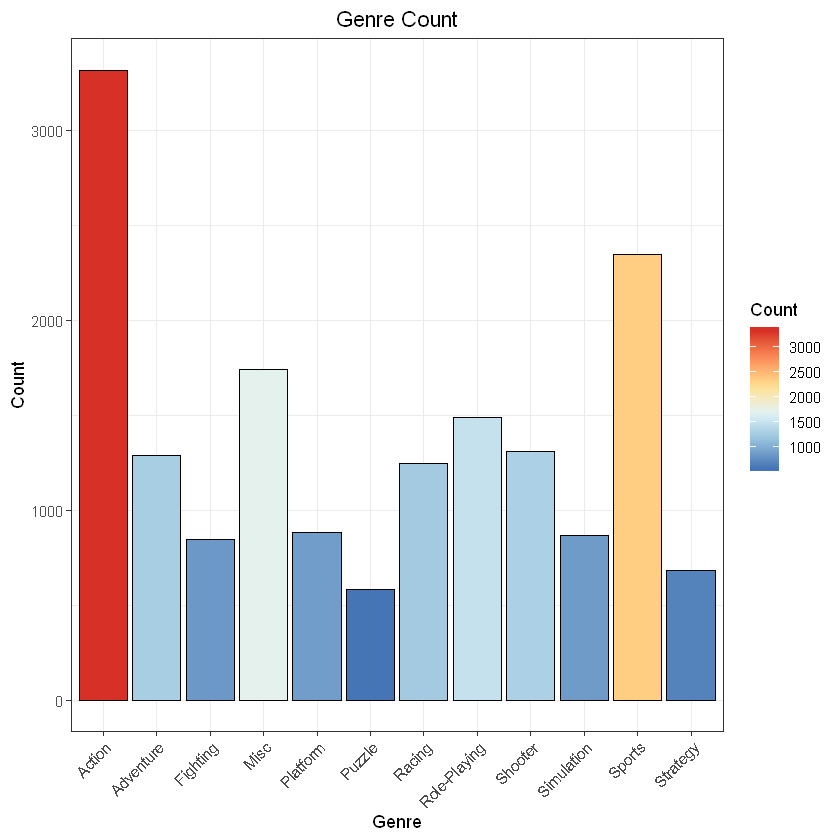

In [9]:
genre_count = df %>% group_by(Genre) %>% summarise(Count = n())

ggplot(data=genre_count , aes(x = Genre,y=Count,fill=Count)) +
geom_bar(colour='black',stat='identity') +
theme_bw()+
ggtitle('Genre Count') + 
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5)) +
scale_fill_distiller(palette = 'RdYlBu') + 
ylab('Count')

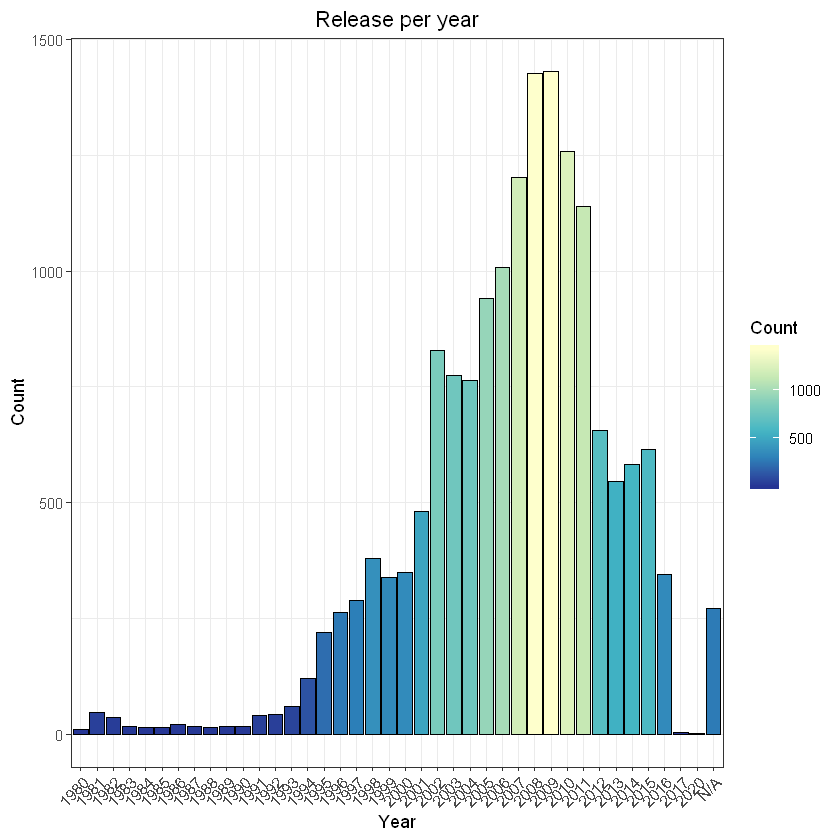

In [10]:
df = filter(df,!is.na(Year))
year_sales = df %>%  group_by(Year) %>% summarise(Count = n()) 

ggplot(data=year_sales,aes(x=Year,y=Count,fill=Count)) + 
geom_bar(colour='black',stat='identity') + 
theme_bw()+
ggtitle('Release per year') +
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5)) + 
scale_fill_distiller(palette = 'YlGnBu')

Selecting by Count


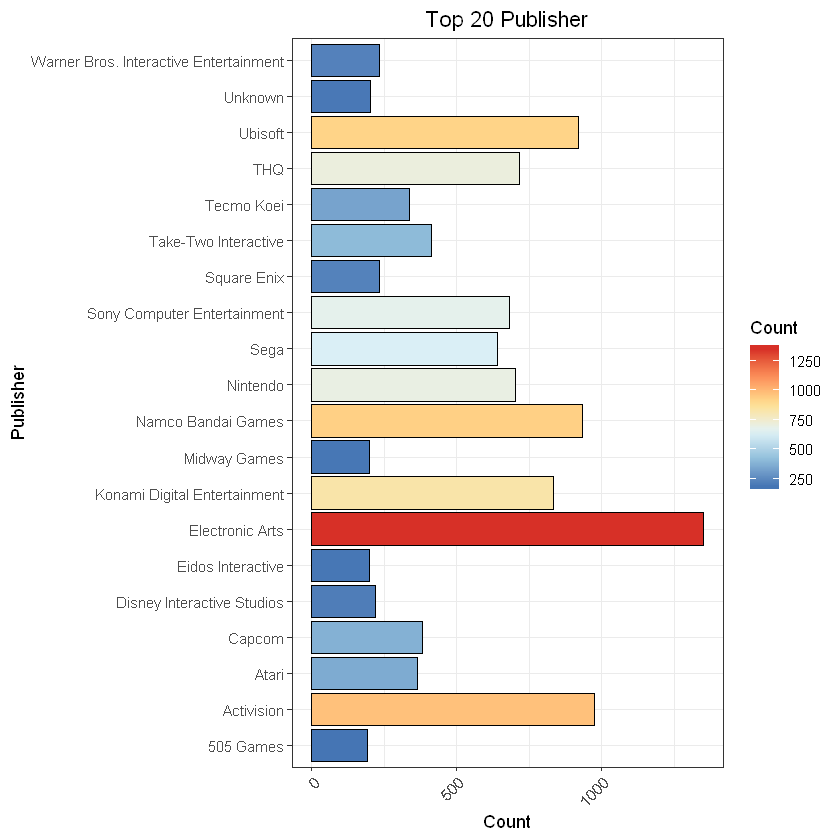

In [11]:
top_publisher = df %>% group_by(Publisher) %>% 
                summarise(Count = n()) %>% 
                arrange(desc(Count)) %>% top_n(20)

ggplot(data=top_publisher,aes(x=Publisher,y=Count,fill=Count)) +
geom_bar(colour='black',stat='identity') + 
theme_bw() +
ggtitle('Top 20 Publisher') + 
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5)) + 
scale_fill_distiller(palette = 'RdYlBu') + 
coord_flip()

Selecting by GlobalSales


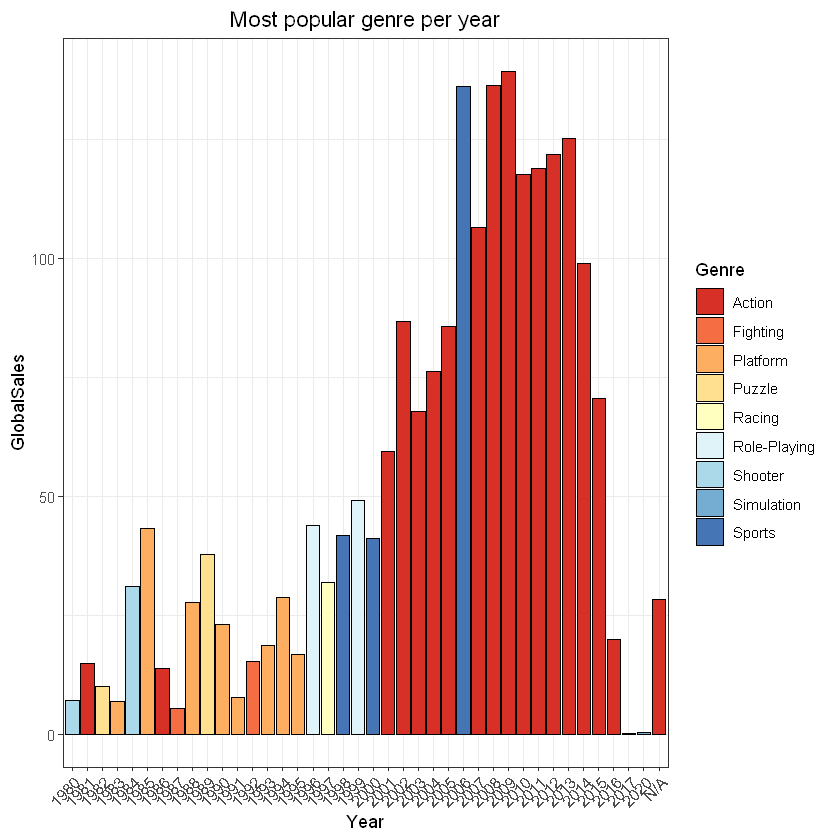

In [12]:
popular_genre_per_year = df %>% group_by(Year,Genre) %>% 
                         summarise(GlobalSales = sum(Global_Sales)) %>%
                         arrange(desc(GlobalSales)) %>%
                         arrange(Year) %>% top_n(1)

ggplot(data = popular_genre_per_year , 
       aes(x = Year, y = GlobalSales,fill=Genre)) +
geom_bar(colour='black',stat='identity') +
ggtitle('Most popular genre per year') +
theme_bw() +
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=.5)) +
scale_fill_brewer(palette = 'RdYlBu')

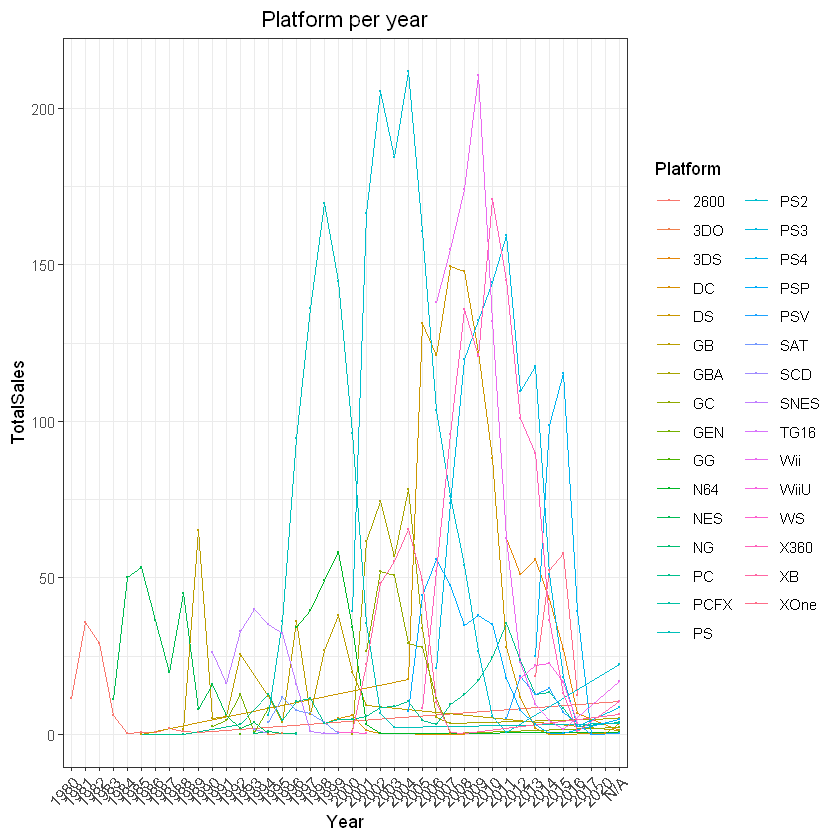

In [13]:
platform = df %>% group_by(Platform,Year) %>%
           summarize(TotalSales = sum(Global_Sales)) %>%
           arrange(desc(TotalSales))

ggplot(data=platform,aes(x = Year,y=TotalSales,colour=Platform,group=Platform)) + 
geom_line(size=.2) + 
geom_point(size=.2)+
ggtitle('Platform per year') + 
theme_bw()+
theme(axis.text.x = element_text(angle=45,hjust=1),
      plot.title = element_text(hjust=0.5))

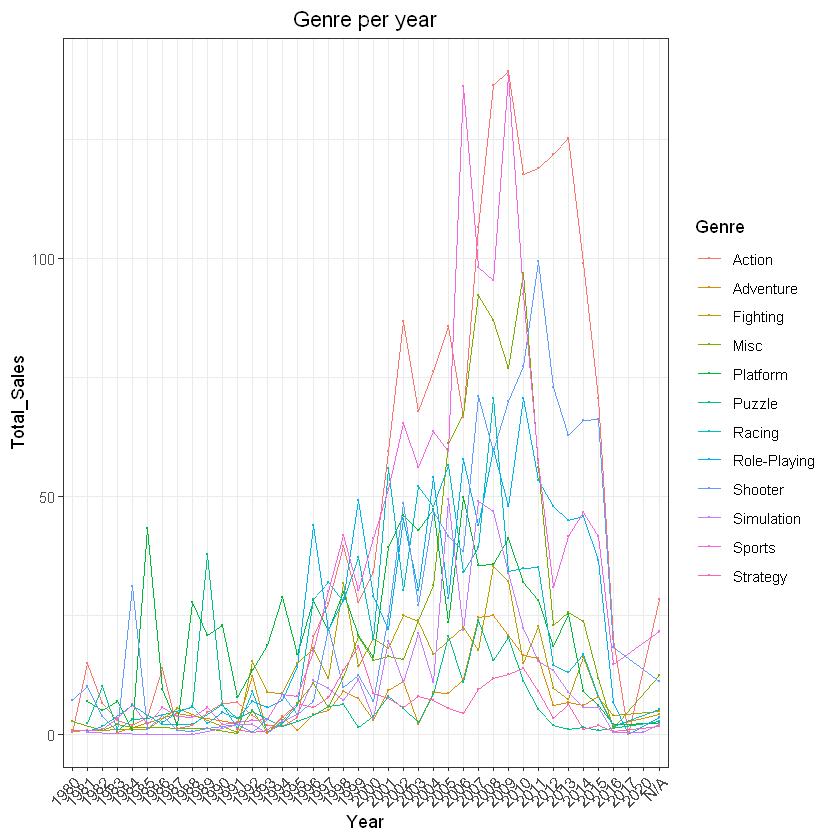

In [14]:
genre = df %>% group_by(Genre,Year) %>%
        summarise(Total_Sales = sum(Global_Sales)) %>%
        arrange(desc(Total_Sales))
ggplot(data=genre,aes(x = Year, y = Total_Sales, colour=Genre, group=Genre)) + 
geom_line(size=.2) + 
geom_point(size=.2)+
ggtitle('Genre per year') + 
theme_bw() + 
theme(axis.text.x = element_text(angle=45,hjust=1) ,
      plot.title = element_text(hjust=.5))

Selecting by Global_Sales


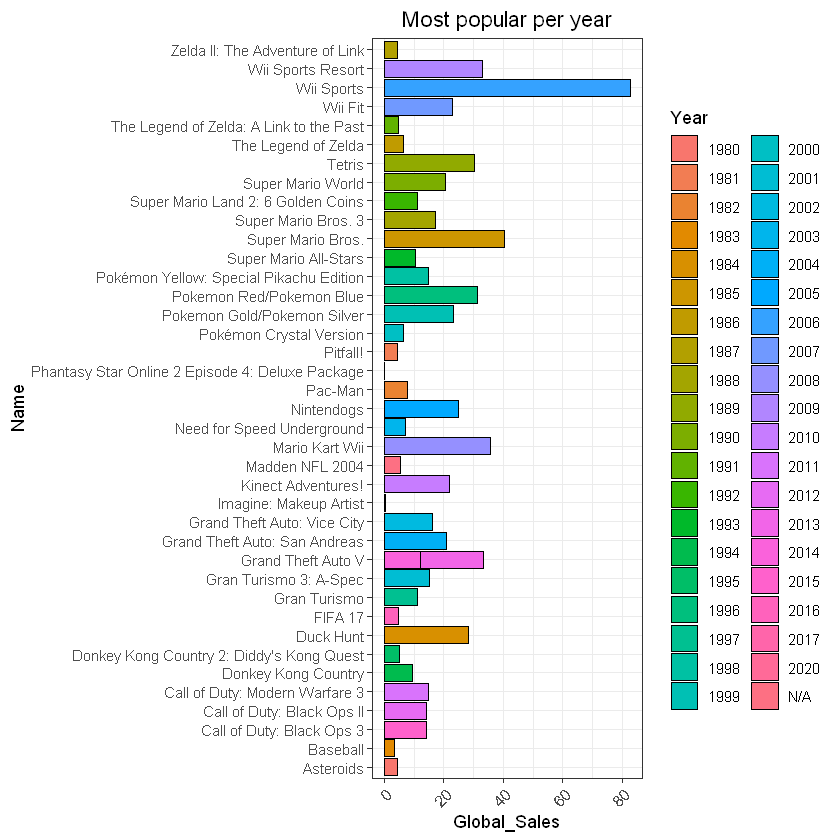

In [15]:
df %>% group_by(Year) %>% 
               arrange(desc(Global_Sales)) %>%
               top_n(1) %>%
               ggplot(aes(x = Name,y = Global_Sales , fill = Year)) + 
               geom_bar(stat = 'identity' , colour='black') + 
               ggtitle('Most popular per year' ) + 
               theme_bw() + 
               theme(axis.text.x = element_text(angle=45,hjust=1),
                     plot.title = element_text(hjust=.5)) +
               coord_flip()

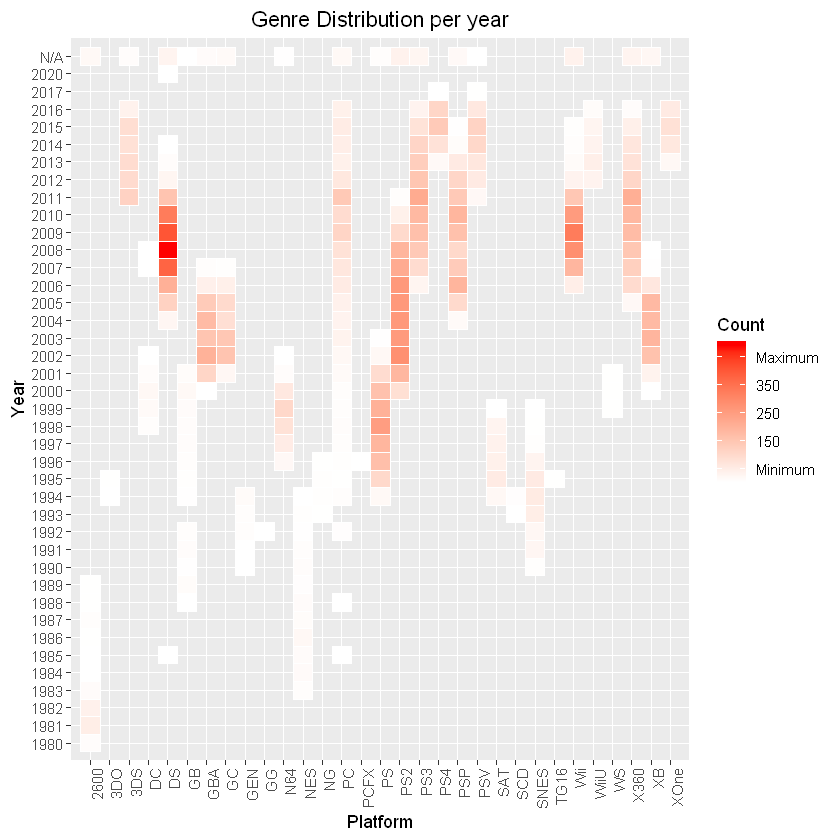

In [16]:
# https://learnr.wordpress.com/2010/01/26/ggplot2-quick-heatmap-plotting/
platform_per_year = df %>% group_by(Platform,Year) %>% summarise(Count = n()) %>% arrange(Year)
ggplot(data = platform_per_year , aes(x = Platform , y = Year)) +
geom_tile(aes(fill=Count),colour='white') + 
theme(axis.text.x = element_text(angle=90,hjust=1),
      plot.title = element_text(hjust=.5)) +
ggtitle('Genre Distribution per year') + 
scale_fill_gradient(low='white',high='red',breaks=c(50,150,250,350,450),
                    labels=c('Minimum',150,250,350,'Maximum')) +
scale_x_discrete(expand=c(0,1))+
scale_y_discrete(expand=c(0,1))